In [49]:
import fnmatch
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc, optimize
from skimage import io, color, measure, img_as_bool, draw
from skimage.filters import threshold_otsu, rank
from skimage import morphology
from scipy.optimize import curve_fit
import os

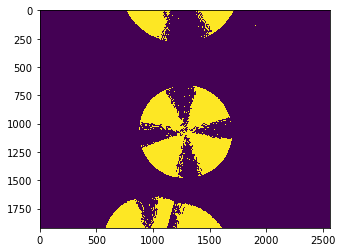

In [103]:
img = misc.imread(r"6s245_140C_10x/140c013t01.tif")

threshold = threshold_otsu(img)
img = img>threshold
img = morphology.remove_small_holes(img, min_size=4300000, connectivity=2, in_place=True)
plt.imshow(img)
plt.show()

In [70]:
img = 1*img
regions = measure.regionprops((img))
bubble = regions[0]

y0, x0 = bubble.centroid
r = bubble.major_axis_length/2.
print(r)
def cost(params):
    x0, y0, r = params
    coords = draw.circle(y0, x0, r, shape=img.shape)
    template = np.zeros_like(img)
    template[coords] = 1
    return -np.sum(template == img)

x0, y0, r = optimize.fmin(cost,(x0, y0, r))
print(r)


417.0043298545773
Optimization terminated successfully.
         Current function value: -4708979.000000
         Iterations: 63
         Function evaluations: 136
411.503050434


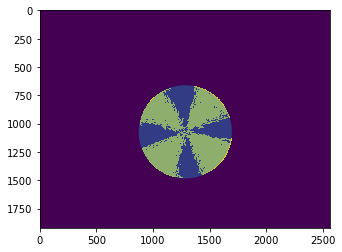

72.703719158


In [71]:
f, ax = plt.subplots()
circle = plt.Circle((x0, y0), r, alpha=0.5)
ax.imshow(img)
ax.add_artist(circle)
plt.show()
print(r/5.66)

In [85]:

path_to_dir = r"6s245_140C_wzrost_20x"
list_img = os.listdir(path_to_dir)
images_path_list = []

for f in list_img:
   if fnmatch.fnmatch(f, '*.tif'):
        print(f)
        images_path_list.append(os.path.join(path_to_dir, f))

for f in images_path_list:
    print(f.split('\\')[-1])

images_path_list = sorted(images_path_list)    
time = [5.32, 301.78, 601.95, 901.98,1200.60, 1500.78, 1800.96, 2101.12]

155c012t8.tif
155c012t2.tif
155c012t4.tif
155c012t3.tif
155c012t5.tif
155c012t1.tif
155c012t7.tif
155c012t6.tif
6s245_140C_wzrost_20x/155c012t8.tif
6s245_140C_wzrost_20x/155c012t2.tif
6s245_140C_wzrost_20x/155c012t4.tif
6s245_140C_wzrost_20x/155c012t3.tif
6s245_140C_wzrost_20x/155c012t5.tif
6s245_140C_wzrost_20x/155c012t1.tif
6s245_140C_wzrost_20x/155c012t7.tif
6s245_140C_wzrost_20x/155c012t6.tif


Optimization terminated successfully.
         Current function value: -4758614.000000
         Iterations: 49
         Function evaluations: 124


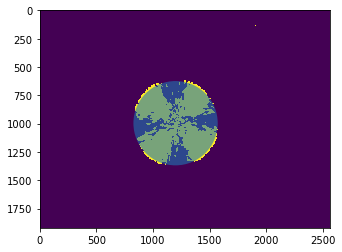

6s245_140C_wzrost_20x/155c012t1.tif
r= 65.75461376477375 um
Optimization terminated successfully.
         Current function value: -4675740.000000
         Iterations: 58
         Function evaluations: 136


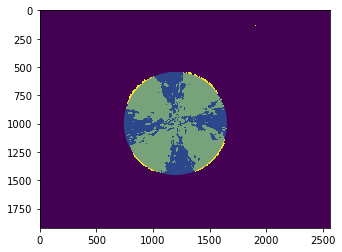

6s245_140C_wzrost_20x/155c012t2.tif
r= 80.48383729387652 um
Optimization terminated successfully.
         Current function value: -4569900.000000
         Iterations: 56
         Function evaluations: 129


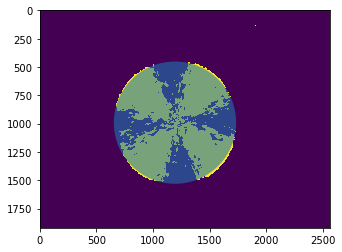

6s245_140C_wzrost_20x/155c012t3.tif
r= 95.38359537630751 um
Optimization terminated successfully.
         Current function value: -4450313.000000
         Iterations: 60
         Function evaluations: 137


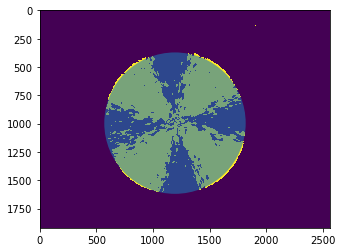

6s245_140C_wzrost_20x/155c012t4.tif
r= 110.29392078194965 um


In [86]:
time = [5.32, 301.78, 601.95, 901.98,1200.60, 1500.78, 1800.96, 2101.12]
R = []
i = 0
for f in images_path_list[:4]:
    
    img = misc.imread(f, mode='L')
    threshold_ot = threshold_otsu(img)
    img = img>threshold_ot
    #img = morphology.remove_small_objects(img, min_size=6000*(1+i/7.0), connectivity=2, in_place=True)
    
    img = 1*img
    regions = measure.regionprops((img))
    bubble = regions[0]

    y0, x0 = bubble.centroid
    r = bubble.major_axis_length/2.
    x0, y0, r = optimize.fmin(cost,(x0, y0, r))
    
    fig, ax = plt.subplots()
    circle = plt.Circle((x0, y0), r, alpha=0.6)
    ax.imshow(img)
    ax.add_artist(circle)
    plt.show()
    print(f.split('\\')[-1])
    #print("time = {} s".format(time[i]))
    print("r= {0} um".format(r/5.66))
    R.append(r/5.66)
    i = i + 1
    

  

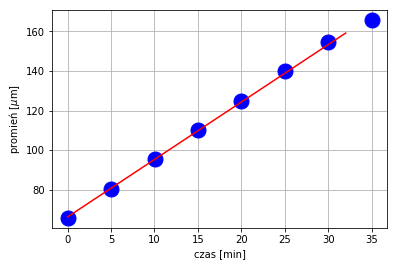

a = 2.902918775159198 +- 0.03810752262066901


In [15]:

def poly1(x, a, b):
    return a*x + b

time = [5.32, 301.78, 601.95, 901.98,1200.60, 1500.78, 1800.96, 2101.12]
radius1 = R
time = np.array(time)/60.0
plt.plot(time, radius1, 'bo', markersize=15)


popt, pcov = curve_fit(poly1, time, radius1)
a = popt[0]
b = popt[1]
error = np.abs(np.diag(pcov) ** 0.5)
da = error[0]
db = error[1]
x = np.linspace(0, 32, 200)
y = a*x + b
plt.plot(x, y, 'r-')
plt.grid(True)
plt.xlabel("czas [min]")
plt.ylabel("promień [$\mu$m]")
plt.show()
print("a = {0} +- {1}".format(a, da))